In [3]:
import pandas as pd 
import numpy as np 

### TimeStamp Object.
- A Timestamp object in Pandas represents a single point in time — similar to Python’s datetime.datetime, but more powerful and efficient for data analysis.
- Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm). 

#### Creating Timestamp objects

In [5]:
# creating a timestamp 
# always provide the string in this format yyyy then mm then dd
pd.Timestamp('2025/07/10')

Timestamp('2025-07-10 00:00:00')

In [8]:
# variations 
pd.Timestamp('2025/07/10')
pd.Timestamp('2025, 7, 10')

Timestamp('2025-07-10 00:00:00')

In [9]:
 # only year 
pd.Timestamp('2025')

Timestamp('2025-01-01 00:00:00')

In [10]:
# using text 
pd.Timestamp('10th july 2025')

Timestamp('2025-07-10 00:00:00')

In [24]:
# providing time also AM and PM
x = pd.Timestamp('10th july 2025 12:24:23AM')

In [25]:
# fetching attributes 
print(x.year)
print(x.month)
print(x.day)
print(x.hour) 
print(x.minute)
print(x.second)

2025
7
10
0
24
23


#### why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [27]:
np.datetime64('2015-07-04')

np.datetime64('2015-07-04')

In [30]:
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [31]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [33]:
# from strings 
type(pd.DatetimeIndex(['2025/07/10', '2025/07/11', '2025/07/20']))

pandas.core.indexes.datetimes.DatetimeIndex

In [45]:
# using python datetime object 
from datetime import datetime 
pd.DatetimeIndex([datetime(2025, 7, 10, 7, 30, 0), datetime(2025, 7, 11, 15, 30, 0), datetime(2025, 8, 20, 21, 30, 8)])

DatetimeIndex(['2025-07-10 07:30:00', '2025-07-11 15:30:00',
               '2025-08-20 21:30:08'],
              dtype='datetime64[ns]', freq=None)

In [46]:
# using pd.timestamps 
pd.DatetimeIndex([pd.Timestamp('2025/07/10'), pd.Timestamp('2025/07/11'), pd.Timestamp('2025/07/20')])

DatetimeIndex(['2025-07-10', '2025-07-11', '2025-07-20'], dtype='datetime64[ns]', freq=None)

### date_range function

In [48]:
# generate daily dates in a given range.
pd.date_range(start='2025/07/10', end='2025/08/30', freq='D')

DatetimeIndex(['2025-07-10', '2025-07-11', '2025-07-12', '2025-07-13',
               '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17',
               '2025-07-18', '2025-07-19', '2025-07-20', '2025-07-21',
               '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25',
               '2025-07-26', '2025-07-27', '2025-07-28', '2025-07-29',
               '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-02',
               '2025-08-03', '2025-08-04', '2025-08-05', '2025-08-06',
               '2025-08-07', '2025-08-08', '2025-08-09', '2025-08-10',
               '2025-08-11', '2025-08-12', '2025-08-13', '2025-08-14',
               '2025-08-15', '2025-08-16', '2025-08-17', '2025-08-18',
               '2025-08-19', '2025-08-20', '2025-08-21', '2025-08-22',
               '2025-08-23', '2025-08-24', '2025-08-25', '2025-08-26',
               '2025-08-27', '2025-08-28', '2025-08-29', '2025-08-30'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# print the alternate date from start to end. 
pd.date_range(start='2025/07/10', end='2025/08/30', freq='2D')

DatetimeIndex(['2025-07-10', '2025-07-12', '2025-07-14', '2025-07-16',
               '2025-07-18', '2025-07-20', '2025-07-22', '2025-07-24',
               '2025-07-26', '2025-07-28', '2025-07-30', '2025-08-01',
               '2025-08-03', '2025-08-05', '2025-08-07', '2025-08-09',
               '2025-08-11', '2025-08-13', '2025-08-15', '2025-08-17',
               '2025-08-19', '2025-08-21', '2025-08-23', '2025-08-25',
               '2025-08-27', '2025-08-29'],
              dtype='datetime64[ns]', freq='2D')

In [51]:
# print after skiping 2 date in between. 
pd.date_range(start='2025/07/10', end='2025/08/30', freq='3D')

DatetimeIndex(['2025-07-10', '2025-07-13', '2025-07-16', '2025-07-19',
               '2025-07-22', '2025-07-25', '2025-07-28', '2025-07-31',
               '2025-08-03', '2025-08-06', '2025-08-09', '2025-08-12',
               '2025-08-15', '2025-08-18', '2025-08-21', '2025-08-24',
               '2025-08-27', '2025-08-30'],
              dtype='datetime64[ns]', freq='3D')

In [52]:
# B -> business days(Monday to Friday)
pd.date_range(start='2025/07/10', end='2025/08/30', freq='B')

DatetimeIndex(['2025-07-10', '2025-07-11', '2025-07-14', '2025-07-15',
               '2025-07-16', '2025-07-17', '2025-07-18', '2025-07-21',
               '2025-07-22', '2025-07-23', '2025-07-24', '2025-07-25',
               '2025-07-28', '2025-07-29', '2025-07-30', '2025-07-31',
               '2025-08-01', '2025-08-04', '2025-08-05', '2025-08-06',
               '2025-08-07', '2025-08-08', '2025-08-11', '2025-08-12',
               '2025-08-13', '2025-08-14', '2025-08-15', '2025-08-18',
               '2025-08-19', '2025-08-20', '2025-08-21', '2025-08-22',
               '2025-08-25', '2025-08-26', '2025-08-27', '2025-08-28',
               '2025-08-29'],
              dtype='datetime64[ns]', freq='B')

In [54]:
# W -> one week per day (It will print the every sunday)
pd.date_range(start='2025/07/10', end='2025/08/30', freq='W')

DatetimeIndex(['2025-07-13', '2025-07-20', '2025-07-27', '2025-08-03',
               '2025-08-10', '2025-08-17', '2025-08-24'],
              dtype='datetime64[ns]', freq='W-SUN')

In [56]:
# H -> Hourly data(factor) we need a date time on each hour between given date. 
pd.date_range(start='2025/07/10', end='2025/08/30', freq='h')

DatetimeIndex(['2025-07-10 00:00:00', '2025-07-10 01:00:00',
               '2025-07-10 02:00:00', '2025-07-10 03:00:00',
               '2025-07-10 04:00:00', '2025-07-10 05:00:00',
               '2025-07-10 06:00:00', '2025-07-10 07:00:00',
               '2025-07-10 08:00:00', '2025-07-10 09:00:00',
               ...
               '2025-08-29 15:00:00', '2025-08-29 16:00:00',
               '2025-08-29 17:00:00', '2025-08-29 18:00:00',
               '2025-08-29 19:00:00', '2025-08-29 20:00:00',
               '2025-08-29 21:00:00', '2025-08-29 22:00:00',
               '2025-08-29 23:00:00', '2025-08-30 00:00:00'],
              dtype='datetime64[ns]', length=1225, freq='h')

In [59]:
# H -> Hourly data(factor) we need a date time on alternate hours between given date. 
pd.date_range(start='2025/07/10', end='2025/08/30', freq='2h')

DatetimeIndex(['2025-07-10 00:00:00', '2025-07-10 02:00:00',
               '2025-07-10 04:00:00', '2025-07-10 06:00:00',
               '2025-07-10 08:00:00', '2025-07-10 10:00:00',
               '2025-07-10 12:00:00', '2025-07-10 14:00:00',
               '2025-07-10 16:00:00', '2025-07-10 18:00:00',
               ...
               '2025-08-29 06:00:00', '2025-08-29 08:00:00',
               '2025-08-29 10:00:00', '2025-08-29 12:00:00',
               '2025-08-29 14:00:00', '2025-08-29 16:00:00',
               '2025-08-29 18:00:00', '2025-08-29 20:00:00',
               '2025-08-29 22:00:00', '2025-08-30 00:00:00'],
              dtype='datetime64[ns]', length=613, freq='2h')

In [60]:
pd.date_range(start='2025/07/10', end='2025/08/30', freq='6h')

DatetimeIndex(['2025-07-10 00:00:00', '2025-07-10 06:00:00',
               '2025-07-10 12:00:00', '2025-07-10 18:00:00',
               '2025-07-11 00:00:00', '2025-07-11 06:00:00',
               '2025-07-11 12:00:00', '2025-07-11 18:00:00',
               '2025-07-12 00:00:00', '2025-07-12 06:00:00',
               ...
               '2025-08-27 18:00:00', '2025-08-28 00:00:00',
               '2025-08-28 06:00:00', '2025-08-28 12:00:00',
               '2025-08-28 18:00:00', '2025-08-29 00:00:00',
               '2025-08-29 06:00:00', '2025-08-29 12:00:00',
               '2025-08-29 18:00:00', '2025-08-30 00:00:00'],
              dtype='datetime64[ns]', length=205, freq='6h')

In [63]:
# M -> Month end It will give the last date of month. 
pd.date_range(start='2025/07/10', end='2025/08/31', freq='ME')

DatetimeIndex(['2025-07-31', '2025-08-31'], dtype='datetime64[ns]', freq='ME')

In [65]:
# M -> Month end It will give the start date of month. 
pd.date_range(start='2025/07/10', end='2025/09/30', freq='MS')

DatetimeIndex(['2025-08-01', '2025-09-01'], dtype='datetime64[ns]', freq='MS')

In [69]:
# YE -> Year end  
pd.date_range(start='2025/07/10', end='2028/08/30', freq='YE')

DatetimeIndex(['2025-12-31', '2026-12-31', '2027-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

In [76]:
# using periods(number of results) 
pd.date_range(start='2025/07/10', periods=15, freq='ME')

DatetimeIndex(['2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31',
               '2025-11-30', '2025-12-31', '2026-01-31', '2026-02-28',
               '2026-03-31', '2026-04-30', '2026-05-31', '2026-06-30',
               '2026-07-31', '2026-08-31', '2026-09-30'],
              dtype='datetime64[ns]', freq='ME')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object.

In [80]:
# simple series example
s = pd.Series(['2025/07/10', '2025/07/11', '2025/07/20'])
s

0    2025/07/10
1    2025/07/11
2    2025/07/20
dtype: object

In [87]:
# since 's' is an object we need to convert it into a date time format. 
pd.to_datetime(s).dt.day_name()

0    Thursday
1      Friday
2      Sunday
dtype: object

In [88]:
# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

0    January
1    January
2        NaN
dtype: object

In [91]:
expence = pd.read_csv('./Datasets/expense_data_1.csv')
expence.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [92]:
expence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [94]:
expence['Date'] = pd.to_datetime(expence['Date'])

In [95]:
expence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [96]:
expence.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


### dt accessor

Accessor object for datetimelike properties of the Series values.

In [98]:
expence['Date'].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int32

In [99]:
expence['Date'].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [100]:
expence['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [103]:
expence['Date'].dt.dayofyear

0       61
1       61
2       60
3       60
4       60
      ... 
272    326
273    326
274    325
275    325
276    325
Name: Date, Length: 277, dtype: int32

In [104]:
expence['Date'].dt.weekday

0      2
1      2
2      1
3      1
4      1
      ..
272    0
273    0
274    6
275    6
276    6
Name: Date, Length: 277, dtype: int32

In [106]:
expence[expence['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00


In [107]:
expence['Date'].dt.is_month_start

0      False
1      False
2       True
3       True
4       True
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

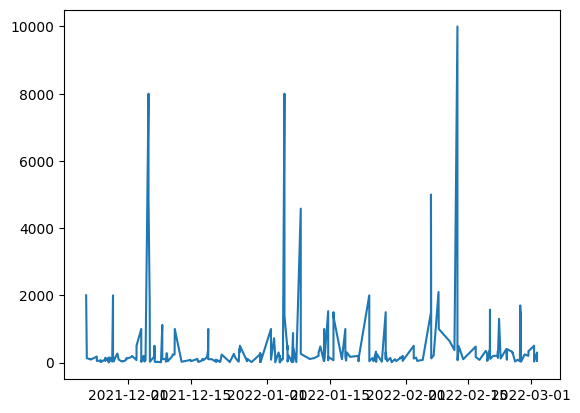

In [109]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(expence['Date'], expence['INR'])

In [112]:
# day name wise bar chart/month wise bar chart 
expence['day_name'] = expence['Date'].dt.day_name()

In [113]:
expence.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday


<Axes: xlabel='day_name'>

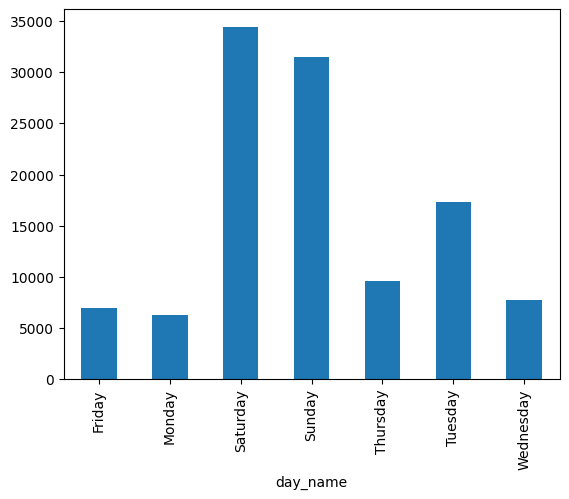

In [119]:
expence.groupby('day_name')['INR'].sum().plot(kind = 'bar')

In [122]:
expence['month_name'] = expence['Date'].dt.month_name()

In [123]:
expence.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,Tuesday,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,Tuesday,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,Tuesday,March


<Axes: xlabel='month_name'>

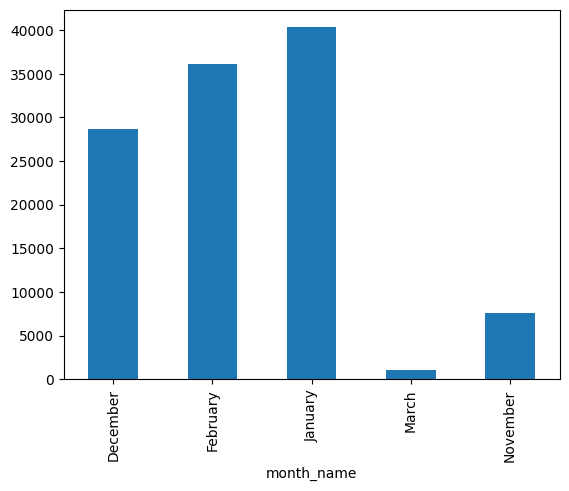

In [126]:
expence.groupby('month_name')['INR'].sum().plot(kind='bar')